In [16]:
#!pip install language_tool_python
#!pip install scikit-learn
#!pip install transformers
#!pip install spacy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 101.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.0/182.0 kB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.9/156.9 kB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 104.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 140.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.0/493.0 kB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.4/922.4 kB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 68.3 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from transformers import BertTokenizer, BertForSequenceClassification, BertModel, BertPreTrainedModel, DistilBertTokenizer, DistilBertModel, DistilBertPreTrainedModel
from sklearn.metrics import mean_squared_error, cohen_kappa_score
import spacy
from sklearn.metrics.pairwise import cosine_similarity


In [5]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModel


In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [3]:
essay_set_1 = pd.read_csv("essay_set_1.csv")
essay_set_1 = essay_set_1.drop('Unnamed: 0', axis=1)
essay_set_1


,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,8.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,9.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,7.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,10.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,8.0
...,...,...,...,...,...,...
1778,1783,1,"Dear @CAPS1, @CAPS2 several reasons on way I t...",4.0,4.0,8.0
1779,1784,1,Do a adults and kids spend to much time on the...,3.0,4.0,7.0
1780,1785,1,My opinion is that people should have computer...,4.0,4.0,8.0
1781,1786,1,"Dear readers, I think that its good and bad to...",1.0,1.0,2.0


In [9]:
df = essay_set_1[["essay_id", "essay"]]
df

,essay_id,essay
0,1,"Dear local newspaper, I think effects computer..."
1,2,"Dear @CAPS1 @CAPS2, I believe that using compu..."
2,3,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl..."
3,4,"Dear Local Newspaper, @CAPS1 I have found that..."
4,5,"Dear @LOCATION1, I know having computers has a..."
...,...,...
1778,1783,"Dear @CAPS1, @CAPS2 several reasons on way I t..."
1779,1784,Do a adults and kids spend to much time on the...
1780,1785,My opinion is that people should have computer...
1781,1786,"Dear readers, I think that its good and bad to..."


In [4]:
import language_tool_python
tool = language_tool_python.LanguageTool('en-US')

Unzipping /tmp/tmprvqczh7e.zip to /root/.cache/language_tool_python.
Downloaded https://www.languagetool.org/download/LanguageTool-6.4.zip to /root/.cache/language_tool_python.


In [15]:
def get_grammar_spelling_errors(text):
    matches = tool.check(text)
    return matches

text = "I am not a patience person, like I can’t sit in a sit for more than five minutes, but there was one time I was patience and i bet very alse was to that right riding a bike where out training wheels. When I was five learned how to ride a bike I just keeped falling of at one piont my bike  flip and I allmost broke my jaw but i didn’t. Finally after @NUM1 weeks of onstint falling I rode for @NUM2 minutes without falling and finally learn how to riken a bike."
matches = get_grammar_spelling_errors(text)
print(f"Grammar errors: {len(matches)}")


Grammar errors: 10


In [6]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 38.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [7]:
nlp = spacy.load("en_core_web_sm")
embedder = pipeline("feature-extraction", model="bert-base-uncased", tokenizer="bert-base-uncased", truncation= True)
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")



def get_sentence_embeddings(text, max_length=512):
    # Tokenize the text into sentences
    doc = nlp(text)
    sentences = [sent.text for sent in doc.sents]

    embeddings = []
    for sentence in sentences:
        tokens = tokenizer(sentence, return_tensors='pt', truncation=True, max_length=max_length)
        with torch.no_grad():
            outputs = model(**tokens)
            sentence_embedding = outputs.last_hidden_state.mean(dim=1).numpy().flatten()
        embeddings.append(sentence_embedding)

    return embeddings

def sentence_similarity(text):
    # Get embeddings for the text
    embeddings = get_sentence_embeddings(text)

    # Calculate cosine similarity between consecutive sentence embeddings
    similarities = [cosine_similarity([embeddings[i]], [embeddings[i+1]])[0, 0] for i in range(len(embeddings) - 1)]
    avg_similarity = np.mean(similarities) if similarities else 0

    return avg_similarity

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [11]:
essay = df["essay"][2]
features = sentence_similarity(essay)
print("Adjencent sentence similarity:", features)


Adjencent sentence similarity: 0.6594054


In [13]:
from collections import Counter
def extract_features(text):
    doc = nlp(text)

    # Lexical Cohesion Features
    tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]
    lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    lemma_counts = Counter(lemmas)

    lexical_repetition_ratio = sum(count for count in lemma_counts.values() if count > 1) / len(tokens) if tokens else 0
    unique_lemmas_count = len(lemma_counts)

    # Pronoun Usage
    pronouns = [token.text.lower() for token in doc if token.pos_ == "PRON"]
    pronoun_count = len(pronouns)

    # Conjunctions and Connectives
    conjunctions = {"and", "or", "but", "because", "although", "however", "therefore", "moreover", "thus", "furthermore", "then"}
    conjunction_count = sum(1 for token in doc if token.text.lower() in conjunctions)

    # Entity Coherence
    entities = [ent.text.lower() for ent in doc.ents]
    entity_counts = Counter(entities)
    entity_repetition_count = sum(count for count in entity_counts.values() if count > 1)

    # Sentence-Level Features
    sentence_lengths = [len(sent) for sent in doc.sents]
    avg_sentence_length = np.mean(sentence_lengths) if sentence_lengths else 0
    sentence_length_std = np.std(sentence_lengths) if sentence_lengths else 0

    # Paragraph-Level Features
    paragraphs = text.split('\n\n')
    paragraph_lengths = [len(p.split()) for p in paragraphs]
    avg_paragraph_length = np.mean(paragraph_lengths) if paragraph_lengths else 0

    features = {
        "lexical_repetition_ratio": lexical_repetition_ratio,
        "unique_lemmas_count": unique_lemmas_count,
        "pronoun_count": pronoun_count,
        "conjunction_count": conjunction_count,
        "entity_repetition_count": entity_repetition_count,
        "avg_sentence_length": avg_sentence_length,
        "sentence_length_std": sentence_length_std,
        "avg_paragraph_length": avg_paragraph_length
    }

    return features


In [14]:
# Example essay
essay = """
The rapid changes in climate are primarily caused by human activities.
This is evident in the increased carbon emissions from vehicles and industries.
Furthermore, deforestation plays a significant role in disrupting ecological balance.
Therefore, it is crucial to adopt sustainable practices to mitigate these impacts.
"""

# Extract features
features = extract_features(essay)
print("Handcrafted Features:", features)

Handcrafted Features: {'lexical_repetition_ratio': 0.15625, 'unique_lemmas_count': 28, 'pronoun_count': 2, 'conjunction_count': 3, 'entity_repetition_count': 0, 'avg_sentence_length': 14.0, 'sentence_length_std': 0.7071067811865476, 'avg_paragraph_length': 45.0}


In [29]:
# !pip install nltk
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")
nltk.download('punkt_tab')

def count_discourse_connectives(essay):
    """
    Count the occurrences of discourse connectives in a given essay.

    Parameters:
    - essay (str): The text of the essay.
    - discourse_connectives (list): List of discourse connectives to look for.

    Returns:
    - connective_counts (Counter): A Counter object with the count of each connective.
    - total_count (int): Total count of discourse connectives found.
    """

    # Define discourse connectives
    discourse_connectives = [
        "furthermore", "moreover", "in addition", "besides", "also", "similarly",
        "as well as", "equally important", "not only", "but also", "however",
        "although", "though", "on the other hand", "nevertheless", "nonetheless",
        "whereas", "while", "despite", "in contrast", "alternatively", "therefore",
        "consequently", "thus", "as a result", "because", "since", "due to",
        "hence", "if", "unless", "provided that", "in case", "as long as",
        "on the condition that", "then", "subsequently", "earlier", "later",
        "meanwhile", "before", "after", "during", "once", "until", "when",
        "indeed", "in fact", "certainly", "especially", "particularly",
        "importantly", "in conclusion", "to sum up", "overall", "in summary",
        "thus", "consequently", "ultimately", "for example", "for instance",
        "such as", "to illustrate", "namely", "in other words", "that is to say",
        "to put it another way"
    ]

    # Tokenize the essay
    tokens = word_tokenize(essay.lower())

    # Count occurrences of discourse connectives
    connective_counts = Counter(token for token in tokens if token in discourse_connectives)
    total_count = sum(connective_counts.values())

    return connective_counts, total_count



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [32]:
# Example usage
essay = df["essay"][5]
connective_counts, total_count = count_discourse_connectives(essay)

print("Discourse Connective Counts:", connective_counts)
print("Total Count:", total_count)

Discourse Connective Counts: Counter({'when': 3, 'then': 2, 'after': 1})
Total Count: 6


In [33]:
from nltk.corpus import stopwords

# Ensure required NLTK resources are downloaded
nltk.download('stopwords')

def calculate_vocabulary_richness(text):
    """
    Calculate the Type-Token Ratio (TTR) to measure vocabulary richness in a given text.

    Parameters:
    text (str): The input text for which to calculate vocabulary richness.

    Returns:
    float: The Type-Token Ratio (TTR) representing the vocabulary richness.
    """
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove punctuation and stopwords
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Calculate the number of unique words and total words
    unique_words = set(tokens)
    total_words = len(tokens)
    unique_word_count = len(unique_words)

    # Calculate Type-Token Ratio (TTR)
    if total_words > 0:
        ttr = unique_word_count / total_words
    else:
        ttr = 0.0

    return ttr




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [34]:
# Example usage
text = df["essay"][4]
vocabulary_richness = calculate_vocabulary_richness(text)
print(f"Type-Token Ratio (TTR): {vocabulary_richness:.2f}")

Type-Token Ratio (TTR): 0.59


In [35]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')


def get_embedding(text, model, tokenizer):
    # Tokenize text
    inputs = tokenizer(text, return_tensors='pt', truncation=False, padding=False)
    input_ids = inputs['input_ids'].squeeze()
    attention_mask = inputs['attention_mask'].squeeze()

    # Process text in chunks
    chunk_size = 512
    embeddings = []
    for i in range(0, len(input_ids), chunk_size):
        chunk_ids = input_ids[i:i + chunk_size].unsqueeze(0)
        chunk_attention_mask = attention_mask[i:i + chunk_size].unsqueeze(0)
        with torch.no_grad():
            outputs = model(input_ids=chunk_ids, attention_mask=chunk_attention_mask)
        chunk_embedding = outputs.last_hidden_state.mean(dim=1).detach().numpy()
        embeddings.append(chunk_embedding)

    # Aggregate chunk embeddings
    aggregated_embedding = np.mean(np.vstack(embeddings), axis=0)
    return aggregated_embedding

def calculate_semantic_relevance(prompt, essay):
    prompt_embedding = get_embedding(prompt, model, tokenizer)
    essay_embedding = get_embedding(essay, model, tokenizer)

    prompt_embedding = prompt_embedding.reshape(1, -1)
    essay_embedding = essay_embedding.reshape(1, -1)

    similarity = cosine_similarity(prompt_embedding, essay_embedding)
    return similarity[0, 0]


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [37]:
essay = df["essay"][1]

# Calculate semantic relevance
score = calculate_semantic_relevance(prompt_1, essay)
print(f"Semantic Relevance Score: {score:.2f}")

Semantic Relevance Score: 0.85


In [4]:
prompt_1 = '''More and more people use computers, but not everyone agrees that this benefits society. Those who support advances in technology believe that computers have a positive effect on people. They teach hand-eye coordination, give people the ability to learn about faraway places and people, and even allow people to talk online with other people. Others have different ideas. Some experts are concerned that people are spending too much time on their computers and less time exercising, enjoying nature, and interacting with family and friends.
Write a letter to your local newspaper in which you state your opinion on the effects computers have on people. Persuade the readers to agree with you.'''

prompt_2 = ''' "All of us can think of a book that we hope none of our children or any other children have taken off the shelf. But if I have the right to remove that book from the shelf -- that work I abhor -- then you also have exactly the same right and so does everyone else. And then we have no books left on the shelf for any of us." --Katherine Paterson, Author
Write a persuasive essay to a newspaper reflecting your vies on censorship in libraries. Do you believe that certain materials, such as books, music, movies, magazines, etc., should be removed from the shelves if they are found offensive? Support your position with convincing arguments from your own experience, observations, and/or reading.'''

#source_essay
prompt_3 = '''Write a response that explains how the features of the setting affect the cyclist. In your response, include examples from the essay that support your conclusion.'''

#source_essay
prompt_4 = ''' Read the last paragraph of the story. When they come back, Saeng vowed silently to herself, in the spring, when the snows melt and the geese return and this hibiscus is budding, then I will take that test again. Write a response that explains why the author concludes the story with this paragraph. In your response, include details and examples from the story that support your ideas.'''

#source_essay
prompt_5 = '''Describe the mood created by the author in the memoir. Support your answer with relevant and specific information from the memoir.'''

##source_essay
prompt_6 = '''Based on the excerpt, describe the obstacles the builders of the Empire State Building faced in attempting to allow dirigibles to dock there. Support your answer with relevant and specific information from the excerpt.'''

prompt_7 = '''Write about patience. Being patient means that you are understanding and tolerant. A patient person experience difficulties without complaining.
Do only one of the following: write a story about a time when you were patient OR write a story about a time when someone you know was patient OR write a story in your own way about patience.'''

prompt_8 = '''We all understand the benefits of laughter. For example, someone once said, “Laughter is the shortest distance between two people.” Many other people believe that laughter is an important part of any relationship. Tell a true story in which laughter was one element or part. '''


In [38]:
!pip install textstat

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip


In [39]:
import textstat


In [40]:
def calculate_all_features(prompt,essay):
  num_grammatical_errors = len(get_grammar_spelling_errors(essay))
  adjacent_sentence_similarity = sentence_similarity(essay)
  features = extract_features(essay)
  connective_counts, total_count = count_discourse_connectives(essay)
  vocabulary_richness = calculate_vocabulary_richness(essay)
  semantic_relevance = calculate_semantic_relevance(prompt, essay)
  #readability scores
  flesch_reading_ease = textstat.flesch_reading_ease(essay)
  flesch_kincaid_grade = textstat.flesch_kincaid_grade(essay)
  gunning_fog_index = textstat.gunning_fog(essay)
  smog_index = textstat.smog_index(essay)
  automated_readability_index = textstat.automated_readability_index(essay)
  coleman_liau_index = textstat.coleman_liau_index(essay)

  return {
      "num_grammatical_errors": num_grammatical_errors,
      "adjacent_sentence_similarity": adjacent_sentence_similarity,
      "lexical_repetition_ratio": features["lexical_repetition_ratio"],
      "unique_lemmas_count": features["unique_lemmas_count"],
      "pronoun_count": features["pronoun_count"],
      "avg_sentence_length": features["avg_sentence_length"],
      "sentence_length_std": features["sentence_length_std"],
      "discourse_connective_count": total_count,
      "vocabulary_richness": vocabulary_richness,
      "semantic_relevance": semantic_relevance,
      "flesch_reading_ease": flesch_reading_ease,
      "flesch_kincaid_grade": flesch_kincaid_grade,
      "gunning_fog_index": gunning_fog_index,
      "smog_index": smog_index,
      "automated_readability_index": automated_readability_index,
      "coleman_liau_index": coleman_liau_index
  }


In [41]:
calculate_all_features(prompt_1, df["essay"][0])

{'num_grammatical_errors': 17,
 'adjacent_sentence_similarity': 0.6759502,
 'lexical_repetition_ratio': 0.5238095238095238,
 'unique_lemmas_count': 95,
 'pronoun_count': 48,
 'avg_sentence_length': 24.6875,
 'sentence_length_std': 14.881694921950254,
 'discourse_connective_count': 8,
 'vocabulary_richness': 0.6666666666666666,
 'semantic_relevance': 0.8355937,
 'flesch_reading_ease': 74.02,
 'flesch_kincaid_grade': 8.5,
 'gunning_fog_index': 10.31,
 'smog_index': 10.2,
 'automated_readability_index': 11.3,
 'coleman_liau_index': 8.54}

In [43]:
df

,essay_id,essay
0,1,"Dear local newspaper, I think effects computer..."
1,2,"Dear @CAPS1 @CAPS2, I believe that using compu..."
2,3,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl..."
3,4,"Dear Local Newspaper, @CAPS1 I have found that..."
4,5,"Dear @LOCATION1, I know having computers has a..."
...,...,...
1778,1783,"Dear @CAPS1, @CAPS2 several reasons on way I t..."
1779,1784,Do a adults and kids spend to much time on the...
1780,1785,My opinion is that people should have computer...
1781,1786,"Dear readers, I think that its good and bad to..."


In [44]:
df_features = df.apply(lambda row: calculate_all_features(prompt_1, row['essay']), axis=1)
df_features

0       {'num_grammatical_errors': 17, 'adjacent_sente...
1       {'num_grammatical_errors': 24, 'adjacent_sente...
2       {'num_grammatical_errors': 14, 'adjacent_sente...
3       {'num_grammatical_errors': 29, 'adjacent_sente...
4       {'num_grammatical_errors': 18, 'adjacent_sente...
                              ...                        
1778    {'num_grammatical_errors': 32, 'adjacent_sente...
1779    {'num_grammatical_errors': 15, 'adjacent_sente...
1780    {'num_grammatical_errors': 14, 'adjacent_sente...
1781    {'num_grammatical_errors': 0, 'adjacent_senten...
1782    {'num_grammatical_errors': 19, 'adjacent_sente...
Length: 1783, dtype: object

In [45]:
df_features

0       {'num_grammatical_errors': 17, 'adjacent_sente...
1       {'num_grammatical_errors': 24, 'adjacent_sente...
2       {'num_grammatical_errors': 14, 'adjacent_sente...
3       {'num_grammatical_errors': 29, 'adjacent_sente...
4       {'num_grammatical_errors': 18, 'adjacent_sente...
                              ...                        
1778    {'num_grammatical_errors': 32, 'adjacent_sente...
1779    {'num_grammatical_errors': 15, 'adjacent_sente...
1780    {'num_grammatical_errors': 14, 'adjacent_sente...
1781    {'num_grammatical_errors': 0, 'adjacent_senten...
1782    {'num_grammatical_errors': 19, 'adjacent_sente...
Length: 1783, dtype: object

In [46]:
features_df = pd.json_normalize(df_features)


In [47]:
features_df

,num_grammatical_errors,adjacent_sentence_similarity,lexical_repetition_ratio,unique_lemmas_count,pronoun_count,avg_sentence_length,sentence_length_std,discourse_connective_count,vocabulary_richness,semantic_relevance,flesch_reading_ease,flesch_kincaid_grade,gunning_fog_index,smog_index,automated_readability_index,coleman_liau_index
0,17,0.675950,0.523810,95,48,24.687500,14.881695,8,0.666667,0.835594,74.02,8.5,10.31,10.2,11.3,8.54
1,24,0.744739,0.606557,105,50,22.800000,12.734206,8,0.591549,0.851565,67.08,9.1,10.21,11.6,10.1,7.95
2,14,0.659405,0.508333,75,26,20.400000,12.877888,4,0.697674,0.891696,68.20,8.7,10.25,12.0,9.9,8.30
3,29,0.721420,0.600000,155,32,21.333333,12.376800,11,0.656250,0.795784,60.24,9.7,10.81,12.3,12.0,10.97
4,18,0.698186,0.631285,102,41,17.266667,7.032938,9,0.594470,0.813838,72.66,7.0,8.01,11.1,7.7,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,32,0.700415,0.632353,114,84,26.000000,13.763305,17,0.613445,0.776895,82.38,7.4,9.76,8.7,9.7,6.85
1779,15,0.598065,0.565789,49,29,11.238095,5.562671,6,0.739583,0.852031,86.20,3.8,5.40,8.2,4.8,6.12
1780,14,0.756314,0.772358,46,39,17.444444,6.701759,5,0.430769,0.873364,71.04,7.6,7.80,11.3,9.0,8.93
1781,0,0.000000,0.000000,7,2,16.000000,0.000000,0,1.000000,0.670406,90.09,4.4,8.67,0.0,4.0,3.76


In [51]:
df_with_features = pd.concat([df, features_df], axis=1)
df_with_features

,essay_id,essay,num_grammatical_errors,adjacent_sentence_similarity,lexical_repetition_ratio,unique_lemmas_count,pronoun_count,avg_sentence_length,sentence_length_std,discourse_connective_count,vocabulary_richness,semantic_relevance,flesch_reading_ease,flesch_kincaid_grade,gunning_fog_index,smog_index,automated_readability_index,coleman_liau_index
0,1,"Dear local newspaper, I think effects computer...",17,0.675950,0.523810,95,48,24.687500,14.881695,8,0.666667,0.835594,74.02,8.5,10.31,10.2,11.3,8.54
1,2,"Dear @CAPS1 @CAPS2, I believe that using compu...",24,0.744739,0.606557,105,50,22.800000,12.734206,8,0.591549,0.851565,67.08,9.1,10.21,11.6,10.1,7.95
2,3,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",14,0.659405,0.508333,75,26,20.400000,12.877888,4,0.697674,0.891696,68.20,8.7,10.25,12.0,9.9,8.30
3,4,"Dear Local Newspaper, @CAPS1 I have found that...",29,0.721420,0.600000,155,32,21.333333,12.376800,11,0.656250,0.795784,60.24,9.7,10.81,12.3,12.0,10.97
4,5,"Dear @LOCATION1, I know having computers has a...",18,0.698186,0.631285,102,41,17.266667,7.032938,9,0.594470,0.813838,72.66,7.0,8.01,11.1,7.7,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,1783,"Dear @CAPS1, @CAPS2 several reasons on way I t...",32,0.700415,0.632353,114,84,26.000000,13.763305,17,0.613445,0.776895,82.38,7.4,9.76,8.7,9.7,6.85
1779,1784,Do a adults and kids spend to much time on the...,15,0.598065,0.565789,49,29,11.238095,5.562671,6,0.739583,0.852031,86.20,3.8,5.40,8.2,4.8,6.12
1780,1785,My opinion is that people should have computer...,14,0.756314,0.772358,46,39,17.444444,6.701759,5,0.430769,0.873364,71.04,7.6,7.80,11.3,9.0,8.93
1781,1786,"Dear readers, I think that its good and bad to...",0,0.000000,0.000000,7,2,16.000000,0.000000,0,1.000000,0.670406,90.09,4.4,8.67,0.0,4.0,3.76


In [49]:
df_with_features = df_with_features.drop(df_with_features.columns[0], axis=1)
df_with_features

,essay,num_grammatical_errors,adjacent_sentence_similarity,lexical_repetition_ratio,unique_lemmas_count,pronoun_count,avg_sentence_length,sentence_length_std,discourse_connective_count,vocabulary_richness,semantic_relevance,flesch_reading_ease,flesch_kincaid_grade,gunning_fog_index,smog_index,automated_readability_index,coleman_liau_index
0,"Dear local newspaper, I think effects computer...",17,0.675950,0.523810,95,48,24.687500,14.881695,8,0.666667,0.835594,74.02,8.5,10.31,10.2,11.3,8.54
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",24,0.744739,0.606557,105,50,22.800000,12.734206,8,0.591549,0.851565,67.08,9.1,10.21,11.6,10.1,7.95
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",14,0.659405,0.508333,75,26,20.400000,12.877888,4,0.697674,0.891696,68.20,8.7,10.25,12.0,9.9,8.30
3,"Dear Local Newspaper, @CAPS1 I have found that...",29,0.721420,0.600000,155,32,21.333333,12.376800,11,0.656250,0.795784,60.24,9.7,10.81,12.3,12.0,10.97
4,"Dear @LOCATION1, I know having computers has a...",18,0.698186,0.631285,102,41,17.266667,7.032938,9,0.594470,0.813838,72.66,7.0,8.01,11.1,7.7,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,"Dear @CAPS1, @CAPS2 several reasons on way I t...",32,0.700415,0.632353,114,84,26.000000,13.763305,17,0.613445,0.776895,82.38,7.4,9.76,8.7,9.7,6.85
1779,Do a adults and kids spend to much time on the...,15,0.598065,0.565789,49,29,11.238095,5.562671,6,0.739583,0.852031,86.20,3.8,5.40,8.2,4.8,6.12
1780,My opinion is that people should have computer...,14,0.756314,0.772358,46,39,17.444444,6.701759,5,0.430769,0.873364,71.04,7.6,7.80,11.3,9.0,8.93
1781,"Dear readers, I think that its good and bad to...",0,0.000000,0.000000,7,2,16.000000,0.000000,0,1.000000,0.670406,90.09,4.4,8.67,0.0,4.0,3.76


In [52]:
df_with_features.to_csv("essay_1_f.csv")

In [117]:
df_trait = pd.read_csv("/root/essay_grading/datasets/Prompt-6.csv")
df_with_features = pd.read_csv("/root/essay_grading/datasets/df_with_features_set_6_2.csv")
df_trait.shape, df_with_features.shape

((1800, 5), (1800, 23))

In [130]:
df_trait

,Essay ID,Content,Prompt Adherence,Language,Narrativity
0,15491,4,3,2,2
1,15972,1,1,3,2
2,16109,4,4,3,3
3,16228,2,1,4,3
4,16352,3,3,4,4
...,...,...,...,...,...
1795,16601,1,1,2,2
1796,16602,3,2,2,2
1797,16603,1,1,2,2
1798,16606,1,1,1,1


In [131]:
df_trait["essay_id"] = df_trait["Essay ID"]

In [132]:
df_trait_scores = pd.merge(df_trait, df_with_features, on='essay_id')


In [133]:
df_trait_scores

,Essay ID,Content,Prompt Adherence,Language,Narrativity,essay_id,Unnamed: 0,essay_set,essay,rater1_domain1,...,sentence_length_std,discourse_connective_count,vocabulary_richness,semantic_relevance,flesch_reading_ease,flesch_kincaid_grade,gunning_fog_index,smog_index,automated_readability_index,coleman_liau_index
0,15491,4,3,2,2,15491,657,6,"Based on the excerpt ""The @CAPS1 Mast"" by Marc...",4.0,...,6.712344,1,0.771084,0.792666,66.44,7.3,8.84,11.0,9.4,10.60
1,15972,1,1,3,2,15972,1138,6,Dirigibles had a top speed of eighty miles. So...,0.0,...,11.010096,1,0.846154,0.792192,75.74,7.9,10.24,10.5,8.8,6.73
2,16109,4,4,3,3,16109,1275,6,The obstacles the builders of the Empire State...,2.0,...,10.664352,3,0.817204,0.800857,74.42,8.4,10.85,10.0,9.9,6.96
3,16228,2,1,4,3,16228,1394,6,In the excerpt The Mooring Mast by Marcia Amid...,4.0,...,8.440046,3,0.650602,0.818813,76.25,7.7,9.85,10.4,9.6,8.01
4,16352,3,3,4,4,16352,1518,6,"Ultimately, it is evident that the entire conc...",3.0,...,8.957198,9,0.762712,0.791756,50.46,11.4,12.67,13.6,12.5,10.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,16601,1,1,2,2,16601,1767,6,The architects building the Empire State Build...,1.0,...,8.182909,2,0.867925,0.822013,68.50,8.6,9.47,9.4,11.5,10.56
1796,16602,3,2,2,2,16602,1768,6,"In the excerpt ""The Mooring Mast"" by @ORGANIZA...",4.0,...,8.607555,2,0.781818,0.823671,62.38,8.9,10.38,11.0,10.3,9.74
1797,16603,1,1,2,2,16603,1769,6,The obstacles the builders of the Empire State...,2.0,...,7.138627,3,0.857143,0.824658,59.03,10.1,12.90,12.7,13.2,12.01
1798,16606,1,1,1,1,16606,1772,6,"Based on the excerpt ""The Mooring mast"" by Mar...",1.0,...,7.118052,3,0.840000,0.815940,75.10,6.0,7.41,9.2,7.3,8.40


In [134]:
df2 = df_trait_scores.drop(columns = ["Essay ID", "Unnamed: 0"])

In [135]:
df2.to_csv("essay_6_with_traits.csv")

In [136]:
df2

,Content,Prompt Adherence,Language,Narrativity,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score,...,sentence_length_std,discourse_connective_count,vocabulary_richness,semantic_relevance,flesch_reading_ease,flesch_kincaid_grade,gunning_fog_index,smog_index,automated_readability_index,coleman_liau_index
0,4,3,2,2,15491,6,"Based on the excerpt ""The @CAPS1 Mast"" by Marc...",4.0,2.0,3.0,...,6.712344,1,0.771084,0.792666,66.44,7.3,8.84,11.0,9.4,10.60
1,1,1,3,2,15972,6,Dirigibles had a top speed of eighty miles. So...,0.0,2.0,0.0,...,11.010096,1,0.846154,0.792192,75.74,7.9,10.24,10.5,8.8,6.73
2,4,4,3,3,16109,6,The obstacles the builders of the Empire State...,2.0,4.0,3.0,...,10.664352,3,0.817204,0.800857,74.42,8.4,10.85,10.0,9.9,6.96
3,2,1,4,3,16228,6,In the excerpt The Mooring Mast by Marcia Amid...,4.0,1.0,2.0,...,8.440046,3,0.650602,0.818813,76.25,7.7,9.85,10.4,9.6,8.01
4,3,3,4,4,16352,6,"Ultimately, it is evident that the entire conc...",3.0,1.0,3.0,...,8.957198,9,0.762712,0.791756,50.46,11.4,12.67,13.6,12.5,10.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,1,1,2,2,16601,6,The architects building the Empire State Build...,1.0,2.0,2.0,...,8.182909,2,0.867925,0.822013,68.50,8.6,9.47,9.4,11.5,10.56
1796,3,2,2,2,16602,6,"In the excerpt ""The Mooring Mast"" by @ORGANIZA...",4.0,3.0,4.0,...,8.607555,2,0.781818,0.823671,62.38,8.9,10.38,11.0,10.3,9.74
1797,1,1,2,2,16603,6,The obstacles the builders of the Empire State...,2.0,1.0,2.0,...,7.138627,3,0.857143,0.824658,59.03,10.1,12.90,12.7,13.2,12.01
1798,1,1,1,1,16606,6,"Based on the excerpt ""The Mooring mast"" by Mar...",1.0,1.0,1.0,...,7.118052,3,0.840000,0.815940,75.10,6.0,7.41,9.2,7.3,8.40


In [137]:
dff = pd.read_csv("essay_1_with_traits.csv")
dff

,Unnamed: 0,Content,Organization,Word Choice,Sentence Fluency,Conventions,essay_id,essay_set,essay,rater1_domain1,...,sentence_length_std,discourse_connective_count,vocabulary_richness,semantic_relevance,flesch_reading_ease,flesch_kincaid_grade,gunning_fog_index,smog_index,automated_readability_index,coleman_liau_index
0,0,4,3,3,3,3,1,1,"Dear local newspaper, I think effects computer...",4.0,...,14.881695,8,0.666667,0.835594,74.02,8.5,10.31,10.2,11.3,8.54
1,1,4,4,4,3,4,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,...,12.734206,8,0.591549,0.851565,67.08,9.1,10.21,11.6,10.1,7.95
2,2,3,3,3,4,4,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,...,12.877888,4,0.697674,0.891696,68.20,8.7,10.25,12.0,9.9,8.30
3,3,5,4,5,4,4,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,...,12.376800,11,0.656250,0.826223,60.24,9.7,10.81,12.3,12.0,10.97
4,4,4,3,4,4,4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,...,7.032938,9,0.594470,0.868435,72.66,7.0,8.01,11.1,7.7,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,1778,4,4,3,4,3,1783,1,"Dear @CAPS1, @CAPS2 several reasons on way I t...",4.0,...,13.763305,17,0.613445,0.797401,82.38,7.4,9.76,8.7,9.7,6.85
1779,1779,2,3,2,2,2,1784,1,Do a adults and kids spend to much time on the...,3.0,...,5.562671,6,0.739583,0.852031,86.20,3.8,5.40,8.2,4.8,6.12
1780,1780,3,3,3,3,4,1785,1,My opinion is that people should have computer...,4.0,...,6.701759,5,0.430769,0.873364,71.04,7.6,7.80,11.3,9.0,8.93
1781,1781,1,1,1,1,1,1786,1,"Dear readers, I think that its good and bad to...",1.0,...,0.000000,0,1.000000,0.670406,90.09,4.4,8.67,0.0,4.0,3.76


In [138]:
dff.columns

Index(['Unnamed: 0', 'Content', 'Organization', 'Word Choice',
       'Sentence Fluency', 'Conventions', 'essay_id', 'essay_set', 'essay',
       'rater1_domain1', 'rater2_domain1', 'domain1_score',
       'num_grammatical_errors', 'adjacent_sentence_similarity',
       'lexical_repetition_ratio', 'unique_lemmas_count', 'pronoun_count',
       'avg_sentence_length', 'sentence_length_std',
       'discourse_connective_count', 'vocabulary_richness',
       'semantic_relevance', 'flesch_reading_ease', 'flesch_kincaid_grade',
       'gunning_fog_index', 'smog_index', 'automated_readability_index',
       'coleman_liau_index'],
      dtype='object')

In [141]:
correlation_matrix = dff[['num_grammatical_errors', 'adjacent_sentence_similarity',
       'lexical_repetition_ratio', 'unique_lemmas_count', 'pronoun_count',
       'avg_sentence_length', 'sentence_length_std',
       'discourse_connective_count', 'vocabulary_richness',
       'semantic_relevance', 'flesch_reading_ease', 'flesch_kincaid_grade',
       'gunning_fog_index', 'smog_index', 'automated_readability_index',
       'coleman_liau_index']].corr()


In [142]:
print(correlation_matrix)

                              num_grammatical_errors  \
num_grammatical_errors                      1.000000   
adjacent_sentence_similarity                0.019389   
lexical_repetition_ratio                    0.024996   
unique_lemmas_count                         0.288895   
pronoun_count                               0.279992   
avg_sentence_length                         0.105652   
sentence_length_std                         0.215710   
discourse_connective_count                  0.194433   
vocabulary_richness                        -0.040830   
semantic_relevance                         -0.529831   
flesch_reading_ease                         0.032323   
flesch_kincaid_grade                        0.071680   
gunning_fog_index                           0.102574   
smog_index                                  0.012080   
automated_readability_index                 0.079534   
coleman_liau_index                         -0.099956   

                              adjacent_sentence

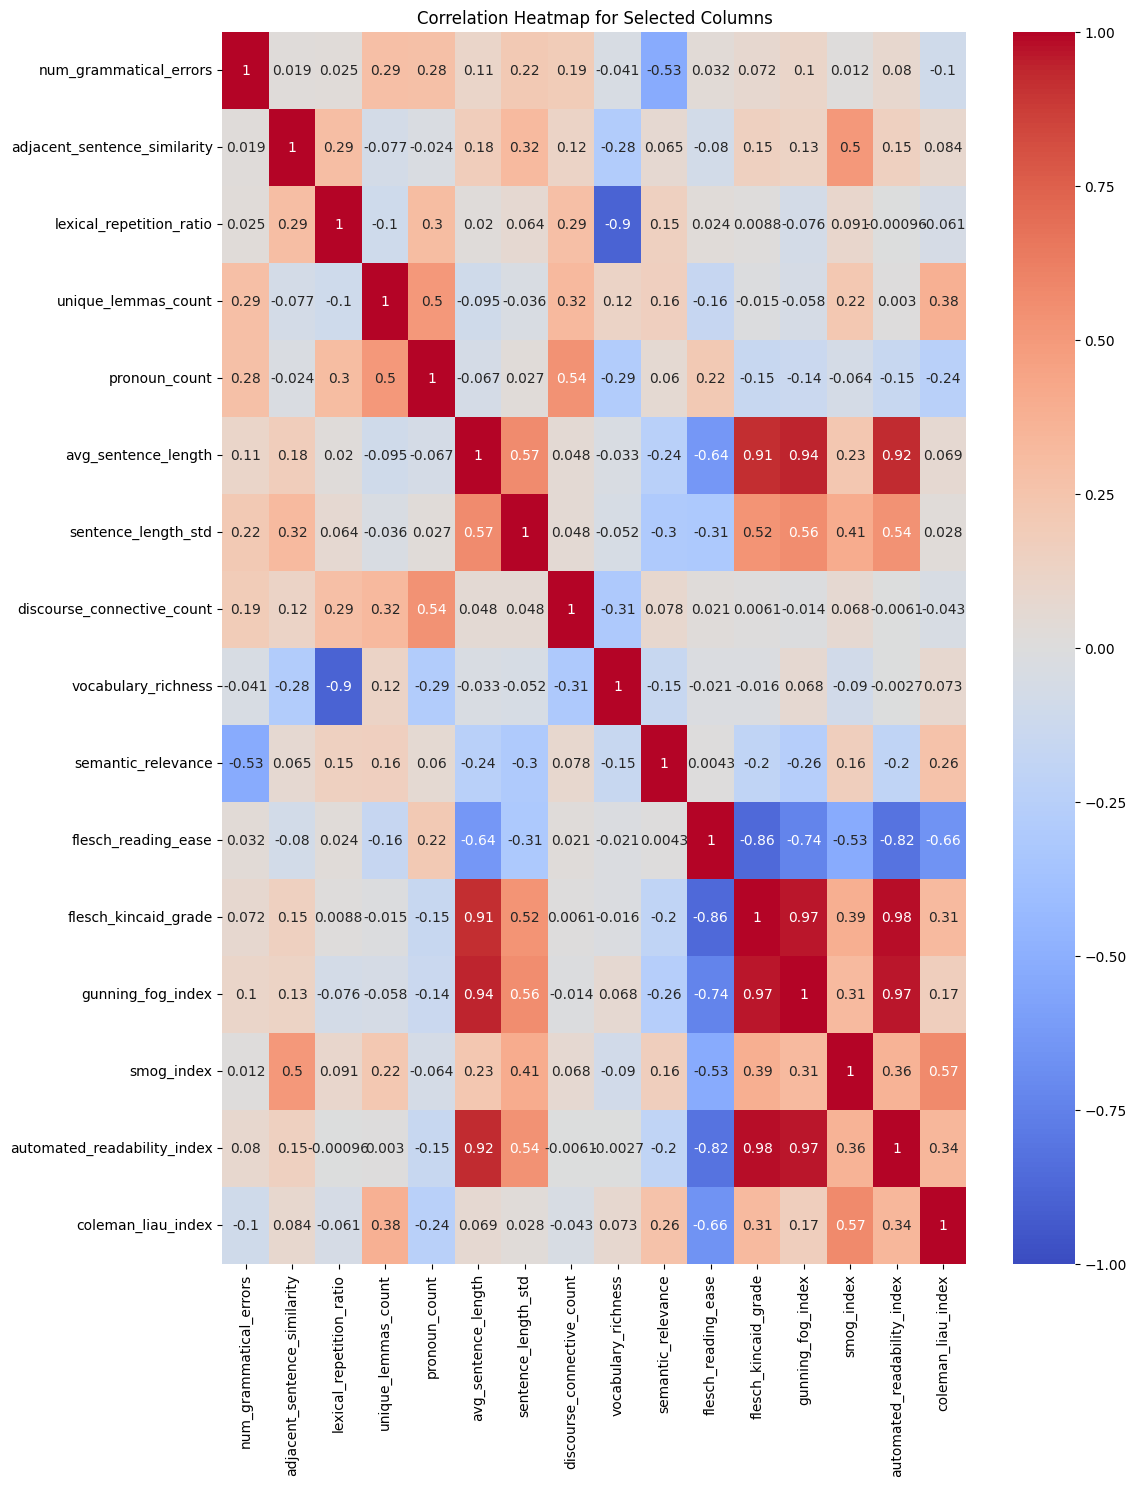

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap for selected columns
plt.figure(figsize=(12, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Selected Columns")
plt.show()


In [146]:
!pip install seaborn matplotlib

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 22.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 kB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 49.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip


In [151]:
df1_trait.columns

Index(['Unnamed: 0', 'Content', 'Organization', 'Word Choice',
       'Sentence Fluency', 'Conventions', 'essay_id', 'essay_set', 'essay',
       'rater1_domain1', 'rater2_domain1', 'domain1_score',
       'num_grammatical_errors', 'adjacent_sentence_similarity',
       'lexical_repetition_ratio', 'unique_lemmas_count', 'pronoun_count',
       'avg_sentence_length', 'sentence_length_std',
       'discourse_connective_count', 'vocabulary_richness',
       'semantic_relevance', 'flesch_reading_ease', 'flesch_kincaid_grade',
       'gunning_fog_index', 'smog_index', 'automated_readability_index',
       'coleman_liau_index'],
      dtype='object')

In [172]:
df1_trait = pd.read_csv("essay_1_with_traits.csv")
df1_trait = df1_trait[['essay_id','Content', 'Organization', 'Word Choice',
       'Sentence Fluency', 'Conventions',  'essay_set', 'essay',
       'num_grammatical_errors',
       'lexical_repetition_ratio', 'unique_lemmas_count','avg_sentence_length','discourse_connective_count', 'vocabulary_richness',
       'semantic_relevance', 'flesch_reading_ease', 'flesch_kincaid_grade']]

In [173]:
df1_trait.columns

Index(['essay_id', 'Content', 'Organization', 'Word Choice',
       'Sentence Fluency', 'Conventions', 'essay_set', 'essay',
       'num_grammatical_errors', 'lexical_repetition_ratio',
       'unique_lemmas_count', 'avg_sentence_length',
       'discourse_connective_count', 'vocabulary_richness',
       'semantic_relevance', 'flesch_reading_ease', 'flesch_kincaid_grade'],
      dtype='object')

In [174]:
df2_trait = pd.read_csv("essay_2_with_traits.csv")
df2_trait = df2_trait[['essay_id','Content', 'Organization', 'Word Choice',
       'Sentence Fluency', 'Conventions',  'essay_set', 'essay',
       'num_grammatical_errors',
       'lexical_repetition_ratio', 'unique_lemmas_count','avg_sentence_length','discourse_connective_count', 'vocabulary_richness',
       'semantic_relevance', 'flesch_reading_ease', 'flesch_kincaid_grade']]
df2_trait.columns

Index(['essay_id', 'Content', 'Organization', 'Word Choice',
       'Sentence Fluency', 'Conventions', 'essay_set', 'essay',
       'num_grammatical_errors', 'lexical_repetition_ratio',
       'unique_lemmas_count', 'avg_sentence_length',
       'discourse_connective_count', 'vocabulary_richness',
       'semantic_relevance', 'flesch_reading_ease', 'flesch_kincaid_grade'],
      dtype='object')

In [175]:
df1_trait.head(2)

,essay_id,Content,Organization,Word Choice,Sentence Fluency,Conventions,essay_set,essay,num_grammatical_errors,lexical_repetition_ratio,unique_lemmas_count,avg_sentence_length,discourse_connective_count,vocabulary_richness,semantic_relevance,flesch_reading_ease,flesch_kincaid_grade
0,1,4,3,3,3,3,1,"Dear local newspaper, I think effects computer...",17,0.523810,95,24.6875,8,0.666667,0.835594,74.02,8.5
1,2,4,4,4,3,4,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",24,0.606557,105,22.8000,8,0.591549,0.851565,67.08,9.1


In [176]:
df2_trait.head(2)

,essay_id,Content,Organization,Word Choice,Sentence Fluency,Conventions,essay_set,essay,num_grammatical_errors,lexical_repetition_ratio,unique_lemmas_count,avg_sentence_length,discourse_connective_count,vocabulary_richness,semantic_relevance,flesch_reading_ease,flesch_kincaid_grade
0,2978,3,3,3,3,3,2,Certain materials being removed from libraries...,14,0.775000,91,27.578947,9,0.551111,0.835495,72.70,9.0
1,2979,1,1,1,1,1,2,Write a persuasive essay to a newspaper reflec...,27,0.410959,52,23.375000,5,0.671642,0.799878,62.69,15.0


In [177]:
result = pd.concat([df1_trait, df2_trait], ignore_index=True)
result.head(2)

,essay_id,Content,Organization,Word Choice,Sentence Fluency,Conventions,essay_set,essay,num_grammatical_errors,lexical_repetition_ratio,unique_lemmas_count,avg_sentence_length,discourse_connective_count,vocabulary_richness,semantic_relevance,flesch_reading_ease,flesch_kincaid_grade
0,1,4,3,3,3,3,1,"Dear local newspaper, I think effects computer...",17,0.523810,95,24.6875,8,0.666667,0.835594,74.02,8.5
1,2,4,4,4,3,4,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",24,0.606557,105,22.8000,8,0.591549,0.851565,67.08,9.1


In [178]:
result.to_csv("essay1-2.csv")

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [5]:
result.columns

NameError: name 'result' is not defined

In [7]:
result = pd.read_csv("essay1-2.csv")
result = result.drop(columns="Unnamed: 0")
result.columns

Index(['essay_id', 'Content', 'Organization', 'Word Choice',
       'Sentence Fluency', 'Conventions', 'essay_set', 'essay',
       'num_grammatical_errors', 'lexical_repetition_ratio',
       'unique_lemmas_count', 'avg_sentence_length',
       'discourse_connective_count', 'vocabulary_richness',
       'semantic_relevance', 'flesch_reading_ease', 'flesch_kincaid_grade'],
      dtype='object')

In [8]:
scores = result[['Content', 'Organization', 'Word Choice','Sentence Fluency', 'Conventions',]]
features = result[['essay_id','essay_set', 'essay',
       'num_grammatical_errors', 'lexical_repetition_ratio',
       'unique_lemmas_count', 'avg_sentence_length',
       'discourse_connective_count', 'vocabulary_richness',
       'semantic_relevance', 'flesch_reading_ease', 'flesch_kincaid_grade']]

In [9]:
train_features, test_features, train_scores, test_scores = train_test_split(features, scores, test_size=0.2, random_state=42)
len(train_features), len(test_features), len(train_scores), len(test_scores)

(2866, 717, 2866, 717)

In [10]:
train_essays = train_features["essay"]
test_essays = test_features["essay"]
train_features_extract = train_features.drop("essay", axis=1)
test_features_extract = test_features.drop("essay", axis=1)

In [11]:
columns_to_scale = ['num_grammatical_errors',
       'lexical_repetition_ratio', 'unique_lemmas_count',
       'avg_sentence_length', 'discourse_connective_count',
       'vocabulary_richness', 'semantic_relevance', 'flesch_reading_ease',
       'flesch_kincaid_grade']

In [12]:
scaler = StandardScaler()

NameError: name 'StandardScaler' is not defined

In [13]:

train_features_extract[columns_to_scale] = scaler.fit_transform(train_features_extract[columns_to_scale])


NameError: name 'scaler' is not defined

In [14]:
train_features_extract

,essay_id,essay_set,num_grammatical_errors,lexical_repetition_ratio,unique_lemmas_count,avg_sentence_length,discourse_connective_count,vocabulary_richness,semantic_relevance,flesch_reading_ease,flesch_kincaid_grade
370,373,1,6,0.495868,83,15.000000,2,0.720000,0.899735,65.42,7.7
1480,1485,1,22,0.598540,82,23.642857,5,0.617450,0.852775,66.17,9.5
598,601,1,8,0.481928,60,16.866667,9,0.811881,0.891721,73.98,6.5
2706,3901,2,12,0.548872,92,27.285714,9,0.723684,0.885959,64.44,10.1
2320,3515,2,12,0.478992,82,22.214286,7,0.703125,0.907346,60.14,9.7
...,...,...,...,...,...,...,...,...,...,...,...
1130,1134,1,23,0.477273,58,21.272727,6,0.696970,0.816318,77.47,7.2
1294,1299,1,6,0.459091,151,18.000000,20,0.725000,0.885069,63.80,8.3
860,863,1,56,0.485915,195,22.806452,9,0.707006,0.742490,73.61,8.7
3507,4702,2,5,0.592308,78,25.200000,8,0.698529,0.910466,73.51,8.7


In [15]:
test_features_extract[columns_to_scale] = scaler.fit_transform(test_features_extract[columns_to_scale])
test_features_extract

NameError: name 'scaler' is not defined

In [16]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [17]:
features.columns

Index(['essay_id', 'essay_set', 'essay', 'num_grammatical_errors',
       'lexical_repetition_ratio', 'unique_lemmas_count',
       'avg_sentence_length', 'discourse_connective_count',
       'vocabulary_richness', 'semantic_relevance', 'flesch_reading_ease',
       'flesch_kincaid_grade'],
      dtype='object')

In [18]:
from torch.utils.data import Dataset, DataLoader
batch_size = 4
class EssayDataset(Dataset):
    def __init__(self, essays, scores, features, tokenizer, max_length=512):
        self.essays = essays.to_list()
        self.scores = scores[['Content', 'Organization', 'Word Choice', 'Sentence Fluency','Conventions']].values.tolist()
        self.features = features[['num_grammatical_errors','lexical_repetition_ratio', 'unique_lemmas_count','avg_sentence_length', 'discourse_connective_count',
                                    'vocabulary_richness', 'semantic_relevance', 'flesch_reading_ease','flesch_kincaid_grade']].values.tolist()
        self.meta = features[['essay_id', 'essay_set']].values.tolist()
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.essays)

    def __getitem__(self, idx):
        essay = self.essays[idx]
        score = self.scores[idx]
        feature = self.features[idx]
        meta = self.meta[idx]

        tokens = self.tokenizer(essay, padding='max_length', truncation=True, max_length=self.max_length, return_tensors='pt')
        return {'input_ids': tokens['input_ids'].squeeze().to(device),
                'attention_mask': tokens['attention_mask'].squeeze().to(device),
                'scores': torch.tensor(score, dtype=torch.float).to(device),
                'features': torch.tensor(feature, dtype=torch.float).to(device),
                'meta':meta}

# Example usage:
train_dataset = EssayDataset(train_essays,
                             train_scores,
                             train_features_extract,
                             tokenizer)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


In [19]:
import torch.nn as nn
class BertForRegression(BertPreTrainedModel):
    def __init__(self, config):
        super().__init__(config)
        self.bert = BertModel(config)
        input_dim = config.hidden_size + 9
        self.dropout = nn.Dropout(p=0.3) 
        self.batch_norm = nn.BatchNorm1d(input_dim)
        
        self.content_head = nn.Linear(input_dim, 1)
        self.org_head = nn.Linear(input_dim, 1)
        self.wordchoice_head = nn.Linear(input_dim, 1)
        self.fluency_head = nn.Linear(input_dim, 1)
        self.convention_head = nn.Linear(input_dim, 1)
        
    def forward(self, input_ids, attention_mask=None, features = None):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0, :]

        # Concatenate features to the CLS output
        if features is not None:
            # Ensure features are of the right type and on the correct device
            features = features.to(cls_output.device, dtype=cls_output.dtype)
            combined_output = torch.cat((cls_output, features), dim=1)  # Concatenate along the feature dimension
            combined_output = self.batch_norm(combined_output)
        else:
            combined_output = cls_output  # If no features are provided, use only the CLS output
        score_1 = self.content_head(combined_output)
        score_2 = self.org_head(combined_output)
        score_3 = self.wordchoice_head(combined_output)
        score_4 = self.fluency_head(combined_output)
        score_5 = self.convention_head(combined_output)
        return score_1, score_2, score_3, score_4, score_5

In [27]:
from transformers import BertConfig
import torch.optim as optim

config = BertConfig.from_pretrained('bert-base-uncased')
model = BertForRegression.from_pretrained('bert-base-uncased', config=config).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-5, weight_decay=0.01)
criterion = torch.nn.MSELoss()

Some weights of BertForRegression were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['batch_norm.bias', 'batch_norm.num_batches_tracked', 'batch_norm.running_mean', 'batch_norm.running_var', 'batch_norm.weight', 'content_head.bias', 'content_head.weight', 'convention_head.bias', 'convention_head.weight', 'fluency_head.bias', 'fluency_head.weight', 'org_head.bias', 'org_head.weight', 'wordchoice_head.bias', 'wordchoice_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [28]:
# Loading a checkpoint
checkpoint = torch.load('model_checkpoint_epoch_14.pt')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
start_epoch = checkpoint['epoch'] + 1  # Resume from the next epoch
 # Optionally load the loss


In [29]:
test_dataset = EssayDataset(test_essays,
                             test_scores,
                             test_features_extract,
                             tokenizer)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


In [30]:
# Function to evaluate the model on the validation set
def evaluate(model, test_dataloader, criterion):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in test_dataloader:
            input_ids = batch['input_ids']
            attention_mask = batch['attention_mask']
            scores = batch['scores']
            features = batch["features"]

            outputs = model(input_ids, attention_mask=attention_mask, features=features)
            outputs_concat = torch.cat(outputs, dim=1)

            loss = criterion(outputs_concat, scores)
            total_loss += loss.item()
    return total_loss / len(test_dataloader)


In [31]:
num_epochs = 20
train_losses = [12.618053848607104,
 12.145056371409524,
 11.636048983330507,
 11.089445770202488,
 10.300939506732936,
 9.364741485321705,
 8.237576884704653,
 6.962263182948656,
 5.666910050387496,
 4.402756221124816,
 3.326023592235653,
 2.396320739633701,
 1.6832729288204111,
 1.2338734735504853]

val_losses = [10.305971535046895,
 11.176009260283577,
 9.500113730960422,
 9.397374399503072,
 8.467622645696004,
 6.966452819771237,
 5.684473824501038,
 4.759306743409899,
 3.9394179701805117,
 3.7404652535915375,
 2.3950958410898844,
 1.8019338144196404,
 0.9246916847096549,
 0.5941449058966504]


for epoch in range(start_epoch, num_epochs):
    model.train()
    epoch_train_loss = 0

    for batch in train_dataloader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        scores = batch['scores']
        features = batch["features"]

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, features=features)
        outputs_concat = torch.cat(outputs, dim=1)

        loss = criterion(outputs_concat, scores)
        loss.backward()
        optimizer.step()

        epoch_train_loss += loss.item()

    avg_train_loss = epoch_train_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)

    # Validation loss
    val_loss = evaluate(model, test_dataloader, criterion)
    val_losses.append(val_loss)

    print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {avg_train_loss:.4f}, Validation Loss: {val_loss:.4f}')

    # # Save model checkpoint
    # checkpoint = {
    #     'epoch': epoch + 1,
    #     'model_state_dict': model.state_dict(),
    #     'optimizer_state_dict': optimizer.state_dict(),
    #     'train_losses': train_losses,
    #     'val_losses': val_losses,
    # }
    # torch.save(checkpoint, f'model_checkpoint_epoch_{epoch + 1}.pt')

Epoch 16/20, Training Loss: 0.9147, Validation Loss: 0.8450
Epoch 17/20, Training Loss: 0.7542, Validation Loss: 0.6163
Epoch 18/20, Training Loss: 0.6710, Validation Loss: 0.5164
Epoch 19/20, Training Loss: 0.5907, Validation Loss: 0.4843
Epoch 20/20, Training Loss: 0.6036, Validation Loss: 0.5094


In [34]:
checkpoint = {
    'epoch': 19,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'train_losses': train_losses,
    'val_losses': val_losses,
}
torch.save(checkpoint, f'model_checkpoint_epoch_19.pt')

In [32]:
train_losses

[12.618053848607104,
 12.145056371409524,
 11.636048983330507,
 11.089445770202488,
 10.300939506732936,
 9.364741485321705,
 8.237576884704653,
 6.962263182948656,
 5.666910050387496,
 4.402756221124816,
 3.326023592235653,
 2.396320739633701,
 1.6832729288204111,
 1.2338734735504853,
 0.9146966842240868,
 0.7542038921843512,
 0.670993966714192,
 0.5907364948711136,
 0.6035924769283338]

In [33]:
val_losses

[10.305971535046895,
 11.176009260283577,
 9.500113730960422,
 9.397374399503072,
 8.467622645696004,
 6.966452819771237,
 5.684473824501038,
 4.759306743409899,
 3.9394179701805117,
 3.7404652535915375,
 2.3950958410898844,
 1.8019338144196404,
 0.9246916847096549,
 0.5941449058966504,
 0.8450024009578758,
 0.6163283878316482,
 0.5163784457163678,
 0.4843312761435906,
 0.5093896737529172]

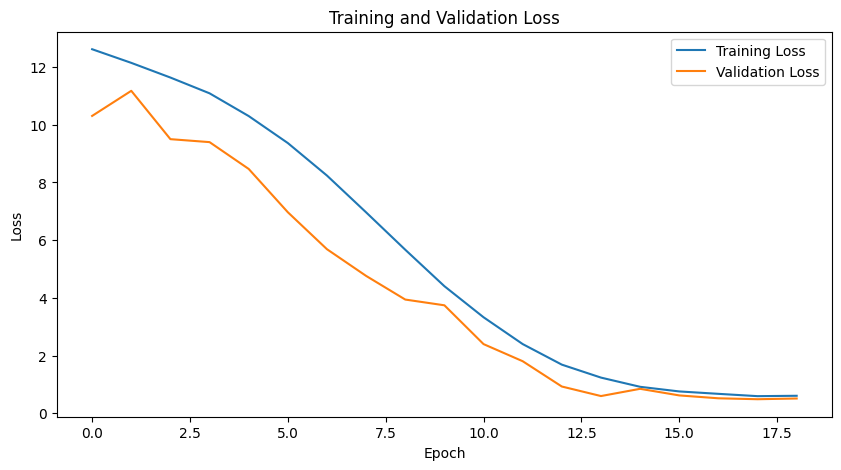

In [35]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

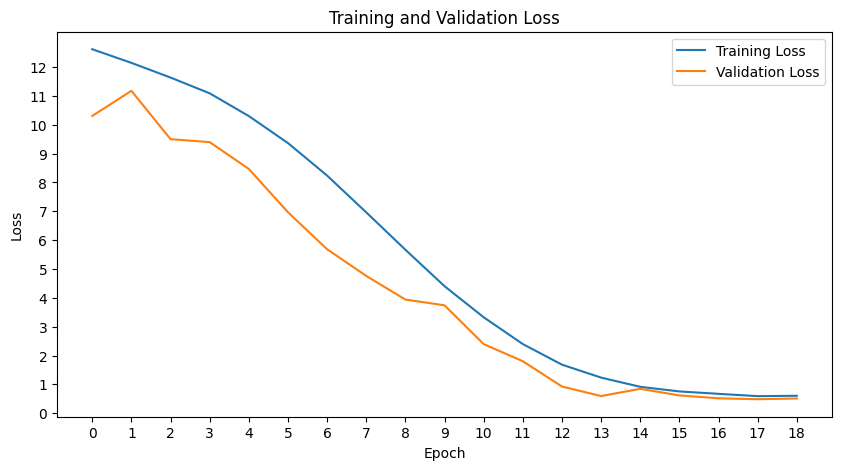

In [36]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Set ticks with a spacing of 1
plt.xticks(range(0, len(train_losses), 1))  # x-axis with a space of 1
plt.yticks(range(0, int(max(max(train_losses), max(val_losses))) + 1, 1))  # y-axis with a space of 1

plt.show()

